In [1]:
#sopt cheak different algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datase
df = pd.read_csv('iris.csv')
X = df.drop('species', axis=1)
y = df.species

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## logistic regg

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
log = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [9]:
penalty = ['l1', 'l2']
#l1_ratio = np.linspace(0,1,10)

In [10]:
# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [11]:
grid_model_log = GridSearchCV(log, param_grid={'C':C, 'penalty':penalty}, scoring='accuracy')

In [12]:
grid_model_log.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [13]:
grid_model_log.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

# KNN classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
k_values = list(range(1,20))

In [17]:
param_grid = {'n_neighbors': k_values}

In [18]:
grid_model_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [19]:
grid_model_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [20]:
grid_model_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

## SVM clasifier

In [21]:
from sklearn.svm import SVC

In [22]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid_svc = GridSearchCV(svm,param_grid)

In [23]:
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [24]:
grid_svc.best_params_

{'C': 1, 'kernel': 'linear'}

# cal accuary

In [25]:
models = []

models.append(('knn', KNeighborsClassifier(algorithm = 'auto', leaf_size: 30, metric: 'minkowski', metric_params: None,
n_jobs: None, n_neighbors: 13, p: 2, weights: 'uniform')))

models.append(('log', LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000, C = 7.742636826811269, penalty =  'l1')))

models.append(('svc', SVC(c= 1, kernel= 'linear')))

In [26]:
results = []
names = []

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

In [28]:
ypred_log = grid_model_log.predict(X_test)
ypred_knn = grid_model_knn.predict(X_test)
ypred_svc = grid_svc.predict(X_test)

In [29]:
models.append(('log', ypred_log))
models.append(('knn', ypred_knn))
models.append(('svc', ypred_svc))

In [30]:
for name, ey in models:
    
    result = accuracy_score(y_test, ey)
    results.append(result)
    names.append(name)
    print(str(name) + ' accuray mean  ' + str(result))

log accuray mean  0.9736842105263158
knn accuray mean  0.9736842105263158
svc accuray mean  1.0


In [31]:
print(classification_report(y_test, ypred_svc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:
confusion_matrix(y_test,ypred_svc)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]], dtype=int64)

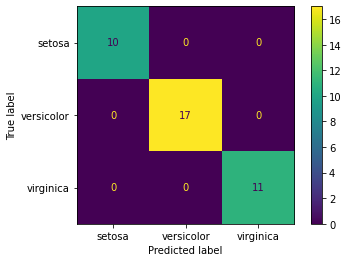

In [33]:
plot_confusion_matrix(grid_svc, X_test, y_test)

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

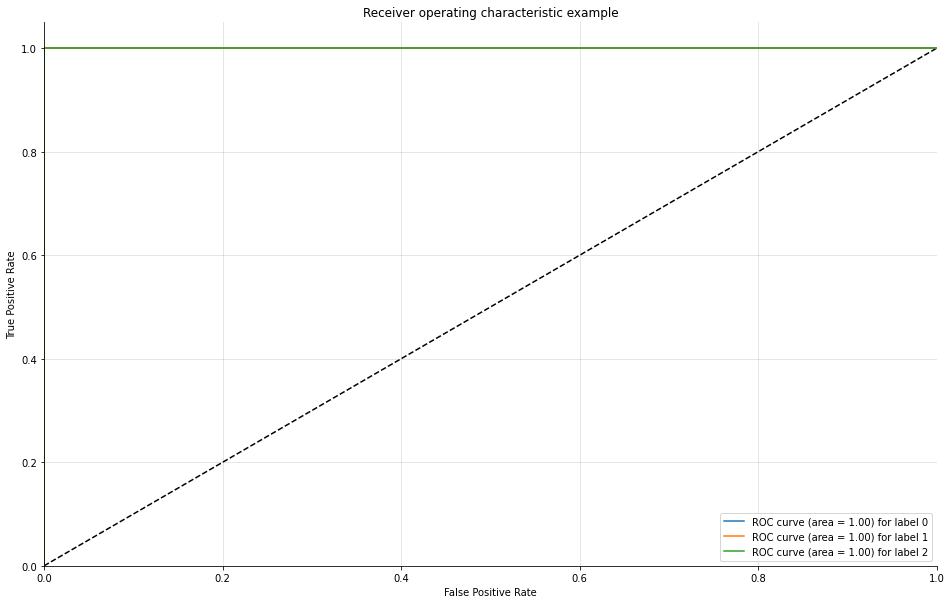

In [36]:
plot_multiclass_roc(grid_svc, X_test, y_test,  n_classes=3, figsize=(16, 10))